# <font color='#FFE15D'>**Week 13: Neural Networks 🧠**</font>

## **🔸 Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

import __main__

## **🔸 Load Dataset**

(1000, 2) (1000,)


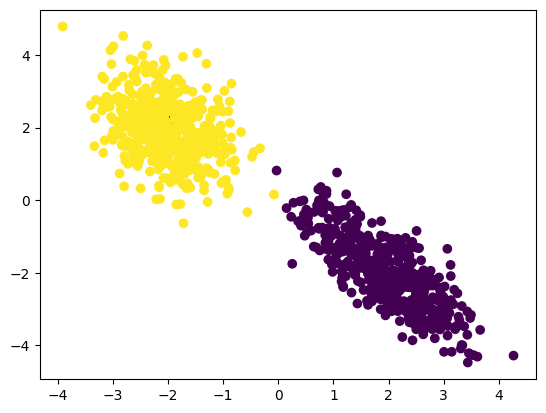

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.0, 
                           n_classes=2, random_state=27)
print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y)

### Train-Test Split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

## **🔸 OOP Style**

In [4]:
model = LogisticRegression(penalty=None)
model.fit(x_train, y_train)
model.predict(x_test)
model.score(x_test, y_test)

1.0

In [5]:
model.intercept_, model.coef_

(array([-0.25645207]), array([[-3.2024035 ,  0.18474029]]))

### OOP Style

In [6]:
# class ModelName:
    
#     def __init__(self, penalty, ...):
#         pass
    
#     def fit(self, x, y):
#         pass
        
#     def predict(self, x):
#         pass
    
#     def score(self, x, y):
#         pass

## **🔸 Neuron (from Scratch)**

### Activation Function

In [7]:
def relu(x):
    return np.maximum(0, x)

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
def tanh(x):
    return np.tanh(x)

### Loss 

In [10]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [11]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

### Accuracy

In [12]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

### Neuron

In [13]:
class Neuron:
    def __init__(
        self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True
    ):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f"Iter={i}, Loss={loss:.4}")

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f"Neuron({self.in_features}, {self.af.__name__})"

    def parameters(self):
        return {"w": self.w, "b": self.b}

In [14]:
neuron = Neuron(in_features=2, af=sigmoid)
neuron.predict(X)
print(neuron)
print(neuron.parameters())

Neuron(2, sigmoid)
{'w': array([[-1.02175022],
       [-1.45217645]]), 'b': -0.6171043000176751}


In [15]:
neuron.fit(x_train, y_train[:, None])
neuron.parameters()

Iter=0, Loss=0.4772
Iter=10, Loss=0.04764
Iter=20, Loss=0.021
Iter=30, Loss=0.01427
Iter=40, Loss=0.01141
Iter=50, Loss=0.009876
Iter=60, Loss=0.008928
Iter=70, Loss=0.008289
Iter=80, Loss=0.007832
Iter=90, Loss=0.007489


{'w': array([[-2.2748911 ],
        [ 0.00445416]]),
 'b': -0.3649316177865341}

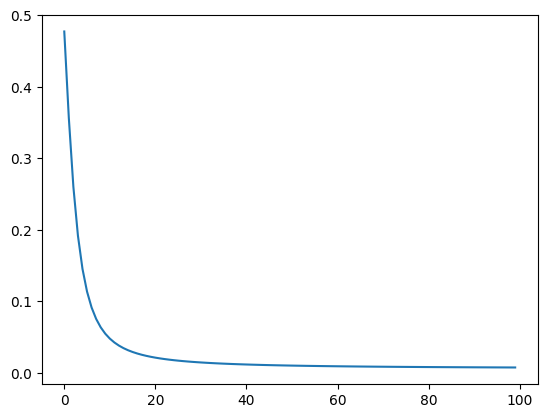

In [16]:
plt.plot(neuron.loss_hist)

### Train

In [17]:
neuron = Neuron(2, af=sigmoid, loss_fn=bce, n_iter=500)
neuron.fit(X, y[:, None])

Iter=0, Loss=2.487
Iter=10, Loss=0.2407
Iter=20, Loss=0.1297
Iter=30, Loss=0.09735
Iter=40, Loss=0.08163
Iter=50, Loss=0.07225
Iter=60, Loss=0.06598
Iter=70, Loss=0.06148
Iter=80, Loss=0.05809
Iter=90, Loss=0.05544
Iter=100, Loss=0.0533
Iter=110, Loss=0.05155
Iter=120, Loss=0.05008
Iter=130, Loss=0.04884
Iter=140, Loss=0.04777
Iter=150, Loss=0.04684
Iter=160, Loss=0.04603
Iter=170, Loss=0.04531
Iter=180, Loss=0.04467
Iter=190, Loss=0.04409
Iter=200, Loss=0.04358
Iter=210, Loss=0.04311
Iter=220, Loss=0.04269
Iter=230, Loss=0.0423
Iter=240, Loss=0.04195
Iter=250, Loss=0.04162
Iter=260, Loss=0.04132
Iter=270, Loss=0.04104
Iter=280, Loss=0.04079
Iter=290, Loss=0.04055
Iter=300, Loss=0.04033
Iter=310, Loss=0.04012
Iter=320, Loss=0.03992
Iter=330, Loss=0.03974
Iter=340, Loss=0.03957
Iter=350, Loss=0.03941
Iter=360, Loss=0.03926
Iter=370, Loss=0.03912
Iter=380, Loss=0.03898
Iter=390, Loss=0.03886
Iter=400, Loss=0.03873
Iter=410, Loss=0.03862
Iter=420, Loss=0.03851
Iter=430, Loss=0.03841
Iter=

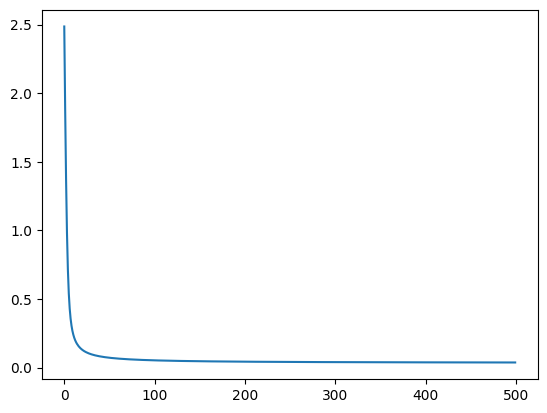

In [18]:
plt.plot(neuron.loss_hist)

### Evaluation

In [19]:
y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)

1.0

In [20]:
y_hat[:, 0], y_test

(array([1.98652633e-04, 6.34417685e-05, 9.99216783e-01, 1.12107511e-04,
        9.99847229e-01, 1.74383458e-01, 9.86649663e-01, 2.03412565e-02,
        9.87674619e-01, 3.54650268e-01, 9.08565197e-04, 9.94739555e-01,
        9.95132200e-01, 9.56042163e-04, 1.70033727e-01, 9.97771423e-01,
        3.41096858e-03, 3.55756122e-04, 3.76093540e-02, 9.99180982e-01,
        1.59358635e-01, 9.97339979e-01, 2.52908451e-04, 2.90541926e-03,
        9.95244208e-01, 9.98174920e-01, 3.14944901e-02, 9.99953028e-01,
        9.89261711e-01, 2.94355689e-03, 9.98817068e-01, 9.96482007e-01,
        1.56024592e-04, 9.78800216e-01, 1.01972047e-02, 9.99038927e-01,
        7.34262229e-03, 1.62677626e-03, 9.92839646e-01, 1.80511854e-02,
        9.30512335e-04, 1.82788352e-03, 2.03937442e-03, 9.99152151e-01,
        9.98389088e-01, 2.24332647e-03, 9.98450621e-01, 7.86397129e-02,
        9.94782136e-01, 6.83521051e-03, 6.97474363e-05, 9.97047701e-01,
        9.88222131e-01, 2.79530986e-03, 1.77461439e-03, 9.875423

### Plot

<Axes: >

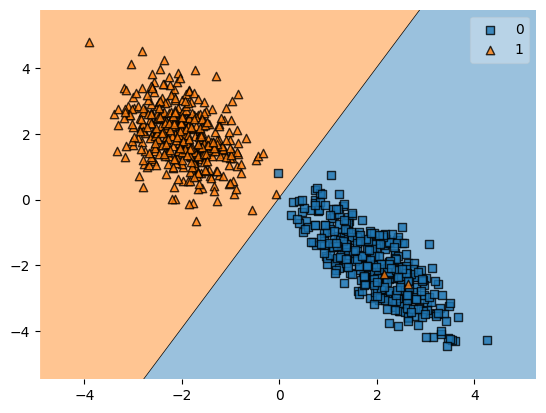

In [21]:
plot_decision_regions(x_train, y_train, clf=neuron)